# Part one

In [127]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

In [338]:
g20=pd.read_csv('D:/Download/notebooks/data/cus_good20.csv',index_col = 0)
b20=pd.read_csv('D:/Download/notebooks/data/cus_bad20.csv',index_col = 0)


In [339]:
def scoreTC(x):
    import re
    a = re.search('[\d.]+', x).group()
    return float(a)

def scoreRE(x):
    import re
    a = re.search('[\d]+ ', x).group()
    return float(a)

g20['Trust_Score']=g20['Trust_Score'].apply(scoreTC)
b20['Trust_Score']=b20['Trust_Score'].apply(scoreTC)
g20['No_of_Reviews']=g20['No_of_Reviews'].apply(scoreRE)
b20['No_of_Reviews']=b20['No_of_Reviews'].apply(scoreRE)
g20['Type']='Good'
b20['Type']='Bad'
result = pd.concat([g20,b20],ignore_index=True)

### Good and bad reviews count

Text(0.5, 1.0, 'Good and Bad Reviews Count')

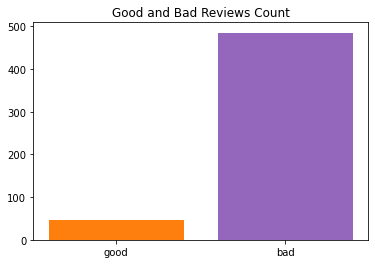

In [340]:
a=result.groupby('Type')['No_of_Reviews'].mean()
cou={'good':int(a[0]),'bad':int(a[1])}
types = list(cou.keys())
value = list(cou.values())
plot.bar(range(len(cou)), value, tick_label=types, color=['tab:orange','tab:purple'])
plot.title('Good and Bad Reviews Count')

# Part two

In [5]:
import numpy as np
Best20=pd.read_csv('D:/Download/notebooks/data/best_comments.csv',index_col=0).reset_index().drop('Number',axis=1)
Best20

,Comments
0,All this place does is double the price of Ama...
1,The jacket purchased for my husband fits perfe...
2,I received my order from Angel Jackets and hav...
3,I'm a new customer but am so impressed with th...
4,It is greatI ordered a leather jacked. I order...
...,...
395,Great website and customer service. Very speed...
396,Luxire has once again been the best service I’...
397,My first order with Luxire-a pair of trousers ...
398,Fantastic made-to-measure service. Ordered a c...


# AFINN score (Sentiment analysis)

## Best 20 comments sentiment analysis

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from afinn import Afinn

def wordCount(x):
    import re
    y=re.sub('[^a-zA-Z0-9]',' ',x).strip()
    x=y.replace('  ',' ').split(' ')
    return len(x)


afinn = Afinn(language='en')
Best20['score']=Best20['Comments'].apply(afinn.score)
Best20['wordcount']=Best20['Comments'].apply(wordCount)
Best20['afinn_adjusted'] = Best20['score'] / Best20['wordcount'] * 100
Best20

,Comments,score,wordcount,afinn_adjusted
0,All this place does is double the price of Ama...,1.0,107,0.934579
1,The jacket purchased for my husband fits perfe...,5.0,47,10.638298
2,I received my order from Angel Jackets and hav...,12.0,46,26.086957
3,I'm a new customer but am so impressed with th...,7.0,41,17.073171
4,It is greatI ordered a leather jacked. I order...,6.0,48,12.500000
...,...,...,...,...
395,Great website and customer service. Very speed...,11.0,43,25.581395
396,Luxire has once again been the best service I’...,19.0,105,18.095238
397,My first order with Luxire-a pair of trousers ...,13.0,105,12.380952
398,Fantastic made-to-measure service. Ordered a c...,16.0,98,16.326531


### Best 20 retails only have 16 negative comments

In [16]:
Best20[Best20.afinn_adjusted<0].count()

Comments          16
score             16
wordcount         16
afinn_adjusted    16
dtype: int64

## Worst 20 retails comments sentiment analysis

In [21]:
import numpy as np
Worst20=pd.read_csv('D:/Download/notebooks/data/worst_comments.csv',index_col=0,encoding = 'unicode_escape').reset_index().drop('Number',axis=1)
Worst20

,Comments
0,"I bought summer trousers totally satisfied, lo..."
1,Have very good experience with wings Stuff is ...
2,Product Awesome Packing jst amazing so soft nd...
3,The best quality with a reasonable price. Outc...
4,I got a beautiful lovely leather wallet. Packi...
...,...
281,"Trash Company, avoid like the plague. Ordered ..."
282,Placed an order which was shipped via UPS - or...
283,Do not buy from campsaver.com. They sent me ...
284,This was not a good experience. I made a larg...


In [23]:
afinn = Afinn(language='en')
Worst20['score']=Worst20['Comments'].apply(afinn.score)
Worst20['wordcount']=Worst20['Comments'].apply(wordCount)
Worst20['afinn_adjusted'] = Worst20['score'] / Worst20['wordcount'] * 100
Worst20

,Comments,score,wordcount,afinn_adjusted
0,"I bought summer trousers totally satisfied, lo...",7.0,10,70.000000
1,Have very good experience with wings Stuff is ...,14.0,22,63.636364
2,Product Awesome Packing jst amazing so soft nd...,16.0,20,80.000000
3,The best quality with a reasonable price. Outc...,7.0,15,46.666667
4,I got a beautiful lovely leather wallet. Packi...,6.0,15,40.000000
...,...,...,...,...
281,"Trash Company, avoid like the plague. Ordered ...",2.0,70,2.857143
282,Placed an order which was shipped via UPS - or...,-8.0,74,-10.810811
283,Do not buy from campsaver.com. They sent me ...,-2.0,83,-2.409639
284,This was not a good experience. I made a larg...,1.0,69,1.449275


### Worst 20 retails have 104 negative comments

In [24]:
Worst20[Worst20.afinn_adjusted<0].count()

Comments          104
score             104
wordcount         104
afinn_adjusted    104
dtype: int64

# Analysis

### Randomly sample 5% reviews from best 20

In [31]:
Worst20[Worst20.afinn_adjusted<0].sample(frac=0.05)

,Comments,score,wordcount,afinn_adjusted
228,The pants fall apart after a few washings and ...,-5.0,31,-16.129032
255,99 times out of 100 and i have ordered over 10...,-4.0,86,-4.651163
141,I believe Mr. David F must not like me or raci...,-11.0,95,-11.578947
18,Received an incomplete order. Sended an email ...,-3.0,16,-18.750000
132,Buyer BewareDo not use this company they are s...,-12.0,80,-15.000000


### Randomly sample 5% reviews from worst 20

In [34]:
Best20[Best20.afinn_adjusted<0].sample(frac=0.05)

,Comments,score,wordcount,afinn_adjusted
104,They advertise the wrong color for their golde...,-4.0,20,-20.0


### Whole data visulization

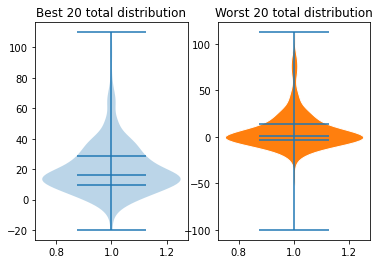

In [146]:
a00=Best20.afinn_adjusted
score00=[float(x) for x in a00]
a01=Worst20.afinn_adjusted
score01=[float(x) for x in a01]
fig,ax = plot.subplots(nrows=1,ncols=2)
ax[0].set_title('Best 20 total distribution')
parts0 = ax[0].violinplot(score00,quantiles=[0.25,0.5,0.75])
ax[1].set_title('Worst 20 total distribution')
parts1 = ax[1].violinplot(score01,quantiles=[0.25,0.5,0.75])
for pc in parts1['bodies']:
    pc.set_facecolor('tab:orange')
    pc.set_edgecolor('white')
    pc.set_alpha(1)

### Positive comments analysis

In [63]:
Bmean=Best20[Best20.afinn_adjusted>0].afinn_adjusted.mean()
Bmin=Best20[Best20.afinn_adjusted>0].afinn_adjusted.min()
Bmax=Best20[Best20.afinn_adjusted>0].afinn_adjusted.max()
Bmedian=Best20[Best20.afinn_adjusted>0].afinn_adjusted.median()
Summarise = {'Best 20 positive comments mean is:':Bmean,'Best 20 positive comments max is:':Bmax,'Best 20 positive comments median is:':Bmedian,'Best 20 positive comments min is:':Bmin}
for key in Summarise:
    print(key,Summarise[key])

Best 20 positive comments mean is: 21.820408841812245
Best 20 positive comments max is: 110.00000000000001
Best 20 positive comments median is: 16.844864809293718
Best 20 positive comments min is: 0.7462686567164178


{'bodies': [<matplotlib.collections.PolyCollection at 0x2a2e9eaa070>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2a2e9eaafa0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2a2e9eb86a0>,
 'cbars': <matplotlib.collections.LineCollection at 0x2a2e9eb8a60>,
 'cquantiles': <matplotlib.collections.LineCollection at 0x2a2e9eb8e20>}

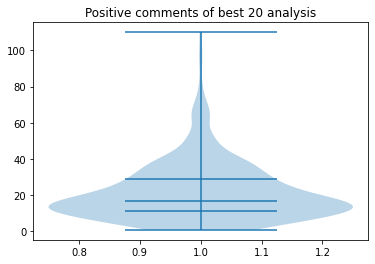

In [102]:
a1=Best20[Best20.afinn_adjusted>0].afinn_adjusted
score1=[float(x) for x in a1]
fig,ax = plot.subplots()
ax.set_title('Positive comments of best 20 analysis')
ax.violinplot(score1,quantiles=[0.25,0.5,0.75])

In [67]:
Wmean=Worst20[Worst20.afinn_adjusted>0].afinn_adjusted.mean()
Wmin=Worst20[Worst20.afinn_adjusted>0].afinn_adjusted.min()
Wmax=Worst20[Worst20.afinn_adjusted>0].afinn_adjusted.max()
Wmedian=Worst20[Worst20.afinn_adjusted>0].afinn_adjusted.median()
Summarise = {'Worst 20 positive comments mean is:':Wmean,'Worst 20 positive comments max is:':Wmax,'Worst 20 positive comments median is:':Wmedian,'Worst 20 positive comments min is:':Wmin}
for key in Summarise:
    print(key,Summarise[key])

Worst 20 positive comments mean is: 20.590221510482674
Worst 20 positive comments max is: 112.5
Worst 20 positive comments median is: 12.403846153846153
Worst 20 positive comments min is: 1.0101010101010102


{'bodies': [<matplotlib.collections.PolyCollection at 0x2a2e9f0bd60>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2a2e9f1adf0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2a2e9f27400>,
 'cbars': <matplotlib.collections.LineCollection at 0x2a2e9f277f0>,
 'cquantiles': <matplotlib.collections.LineCollection at 0x2a2e9f27bb0>}

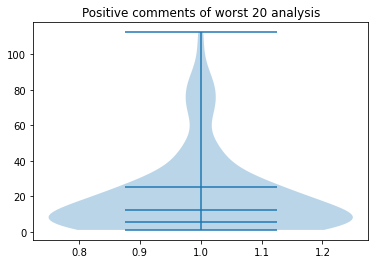

In [103]:
a2=Worst20[Worst20.afinn_adjusted>0].afinn_adjusted
score2=[float(x) for x in a2]
fig,ax = plot.subplots()
ax.set_title('Positive comments of worst 20 analysis')
ax.violinplot(score2,quantiles=[0.25,0.5,0.75])

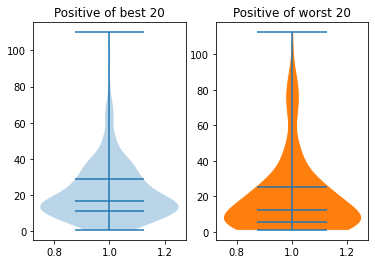

In [119]:
fig,ax = plot.subplots(nrows=1,ncols=2)
ax[0].set_title('Positive of best 20')
parts0 = ax[0].violinplot(score1,quantiles=[0.25,0.5,0.75])
ax[1].set_title('Positive of worst 20')
#ax[1].violinplot(score2,quantiles=[0.25,0.5,0.75])
parts1 = ax[1].violinplot(score2,quantiles=[0.25,0.5,0.75])
for pc in parts1['bodies']:
    pc.set_facecolor('tab:orange')
    pc.set_edgecolor('white')
    pc.set_alpha(1)

### Negative comments analysis

In [65]:
Bmean=Best20[Best20.afinn_adjusted<0].afinn_adjusted.mean()
Bmin=Best20[Best20.afinn_adjusted<0].afinn_adjusted.min()
Bmax=Best20[Best20.afinn_adjusted<0].afinn_adjusted.max()
Bmedian=Best20[Best20.afinn_adjusted<0].afinn_adjusted.median()
Summarise = {'Best 20 negative comments mean is:':Bmean,'Best 20 negative comments max is:':Bmax,'Best 20 negative comments median is:':Bmedian,'Best 20 negative comments min is:':Bmin}
for key in Summarise:
    print(key,Summarise[key])


Best 20 negative comments mean is: -6.594482069025773
Best 20 negative comments max is: -1.694915254237288
Best 20 negative comments median is: -4.967948717948717
Best 20 negative comments min is: -20.0


{'bodies': [<matplotlib.collections.PolyCollection at 0x2a2e9b3f910>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2a2e9b4e940>,
 'cmins': <matplotlib.collections.LineCollection at 0x2a2e9b4ef10>,
 'cbars': <matplotlib.collections.LineCollection at 0x2a2e9b5f310>,
 'cquantiles': <matplotlib.collections.LineCollection at 0x2a2e9b5f6d0>}

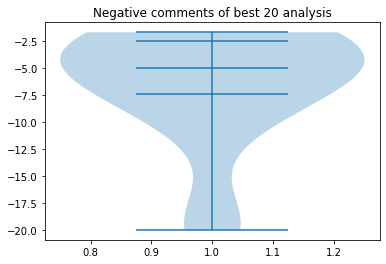

In [97]:
a3=Best20[Best20.afinn_adjusted<0].afinn_adjusted
score3=[float(x) for x in a3]
fig,ax = plot.subplots()
ax.set_title('Negative comments of best 20 analysis')
ax.violinplot(score3,quantiles=[0.25,0.5,0.75])

In [66]:
Wmean=Worst20[Worst20.afinn_adjusted<0].afinn_adjusted.mean()
Wmin=Worst20[Worst20.afinn_adjusted<0].afinn_adjusted.min()
Wmax=Worst20[Worst20.afinn_adjusted<0].afinn_adjusted.max()
Wmedian=Worst20[Worst20.afinn_adjusted<0].afinn_adjusted.median()
Summarise = {'Worst 20 negative comments mean is:':Wmean,'Worst 20 negative comments max is:':Wmax,'Worst 20 negative comments median is:':Wmedian,'Worst 20 negative comments min is:':Wmin}
for key in Summarise:
    print(key,Summarise[key])

Worst 20 negative comments mean is: -8.487770289699371
Worst 20 negative comments max is: -0.5102040816326531
Worst 20 negative comments median is: -5.495169082125604
Worst 20 negative comments min is: -100.0


{'bodies': [<matplotlib.collections.PolyCollection at 0x2a2e9bca0a0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2a2e9bbefd0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2a2e9bca640>,
 'cbars': <matplotlib.collections.LineCollection at 0x2a2e9bcaa00>,
 'cquantiles': <matplotlib.collections.LineCollection at 0x2a2e9bcadc0>}

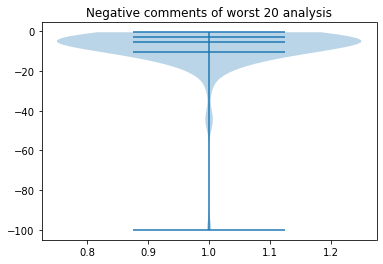

In [98]:
a4=Worst20[Worst20.afinn_adjusted<0].afinn_adjusted
score4=[float(x) for x in a4]
fig,ax = plot.subplots()
ax.set_title('Negative comments of worst 20 analysis')
ax.violinplot(score4,quantiles=[0.25,0.5,0.75])

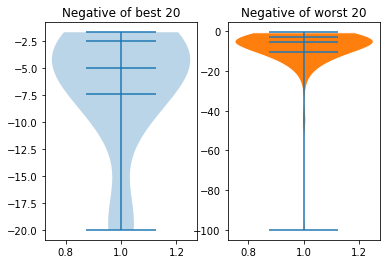

In [120]:
fig,ax = plot.subplots(nrows=1,ncols=2)
ax[0].set_title('Negative of best 20')
parts0 = ax[0].violinplot(score3,quantiles=[0.25,0.5,0.75])
ax[1].set_title('Negative of worst 20')
parts1 = ax[1].violinplot(score4,quantiles=[0.25,0.5,0.75])
for pc in parts1['bodies']:
    pc.set_facecolor('tab:orange')
    pc.set_edgecolor('white')
    pc.set_alpha(1)

## kde plot

Text(0.5, 1.0, 'Best 20 and Worst 20 total Afinn score distribution')

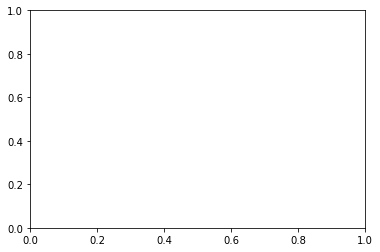

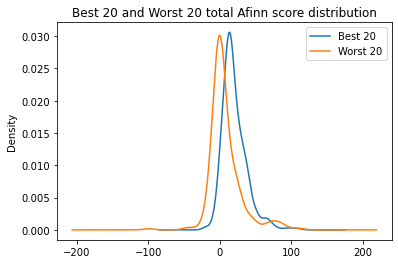

In [165]:
fig,ax = plot.subplots()
score00=pd.Series(score00)
score01=pd.Series(score01)
fig1 = pd.DataFrame({'Best 20':score00,'Worst 20': score01})
ax= fig1.plot.kde()
plot.title('Best 20 and Worst 20 total Afinn score distribution')

Text(0.5, 1.0, 'Best 20 and Worst 20 Positive Afinn score distribution')

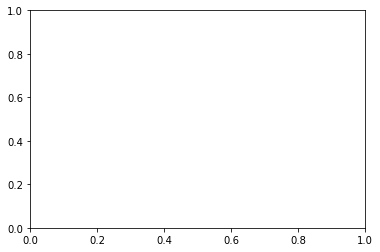

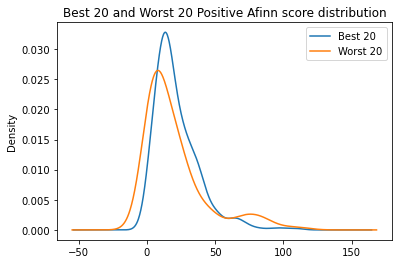

In [166]:
fig,ax = plot.subplots()
score1=pd.Series(score1)
score2=pd.Series(score2)
fig2 = pd.DataFrame({'Best 20':score1,'Worst 20': score2})
ax= fig2.plot.kde()
plot.title('Best 20 and Worst 20 Positive Afinn score distribution')
#ax1= score1.plot.kde()
#ax2= score2.plot.kde()

Text(0.5, 1.0, 'Best 20 and Worst 20 Negative Afinn score distribution')

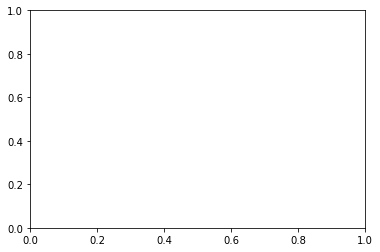

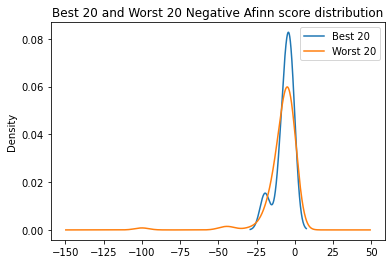

In [167]:
fig,ax = plot.subplots()
score3=pd.Series(score3)
score4=pd.Series(score4)
fig3 = pd.DataFrame({'Best 20':score3,'Worst 20': score4})
ax= fig3.plot.kde()
plot.title('Best 20 and Worst 20 Negative Afinn score distribution')
#ax1= score3.plot.kde()
#ax2= score4.plot.kde()